### Importing Liabraries

In [44]:
import matplotlib.pyplot as plt
from skimage.io import imread,imshow
from skimage.feature import Cascade
from skimage import data
from skimage.filters import gaussian

### Loading Image

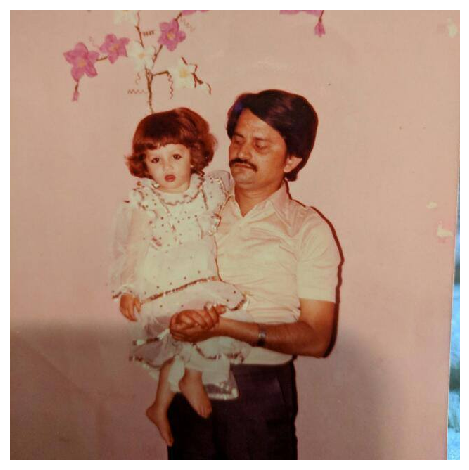

In [122]:
image=imread('sabheen_abbu.jpg')
plt.axis("off")
imshow(image)
#image=data.astronaut()
#imshow(image)


In [123]:
image.shape

(640, 640, 3)

### Initializing the detector

In [132]:
trained_file=data.lbp_frontal_face_cascade_filename()
detector=Cascade(trained_file)

### Detecting Coordinates for a face

In [139]:
detected=detector.detect_multi_scale(img=image,
                                     scale_factor=1.2, # by which the searching window is multiplied in each step
                                     step_ratio=1, # 1 represent an exhaustive search and usually is slow.By setting to the higher values the result will be worse but the computation will be much faster 
                                     min_size=(50,50),
                                     max_size=(200,200)   ) # interval for the search window that rae applied to the input image to detect the faces

# detector will return the coordinates of the boxes that contain the face
print(detected)

[]


### Defining Function for to detect FACE

In [140]:
def getface(d):
    x,y=d['r'],d['c'] # starting point of the face rectangle

    width,height=d['r']+d['width'],d['c']+d['height']
    face=image[x:width,y:height]
    return face

### Detecting all the faces in an image

In [141]:
for d in detected:
    face=getface(d)    
    gaussian_face=gaussian(face,sigma=1, channel_axis=-1)
    imshow(gaussian_face)
   

In [142]:
def mergeblurryface(original,gaussian_image):
    x,y=d['r'],d['c']

    width,height=d['r']+d['width'],d['c']+d['height']
    original[x:width,y:height]=gaussian_image
    return original


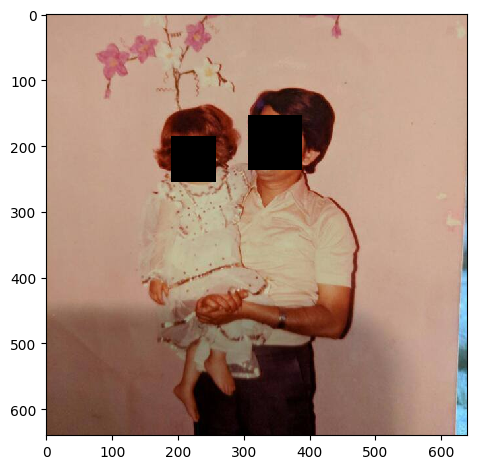

In [143]:
resulting_image=mergeblurryface(image,gaussian_face)
imshow(resulting_image)

In [144]:
from skimage.feature import Cascade
from skimage import data

trained_file = data.lbp_frontal_face_cascade_filename() # load the training file

detector = Cascade(trained_file) # initialize the detector cascade.
astronaut_image = imread("sabheen_abbu.jpg")

# Apply detector on the image
detected = detector.detect_multi_scale(img=astronaut_image, 
                                       scale_factor=1.2,
                                        step_ratio=1,
                                        min_size=(10, 10), max_size=(300, 300))

print(detected)


[{'r': 161, 'c': 325, 'width': 53, 'height': 53}, {'r': 349, 'c': 348, 'width': 53, 'height': 53}, {'r': 191, 'c': 192, 'width': 65, 'height': 65}]


In [120]:
from matplotlib import patches

def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()



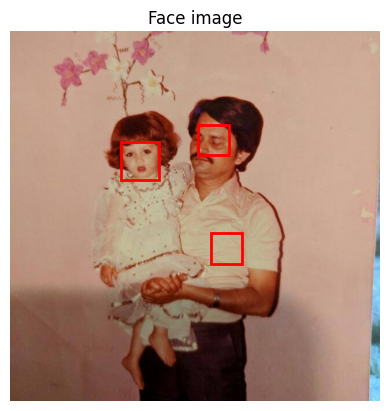

In [121]:
show_detected_face(astronaut_image, detected)